In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/V7_updated_17_aug.xlsx")
data.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits
0,0062M00000bmHA5QAM,2018-12-19 22:52:01,2019-01-14,Hafteh Bazaar Magazine-Renewal Deal-12192018,0064100000b8jUhAAI,Default,100.0,0.61,534.0,1.0,...,0.0,NaN,0.00,NaN,Manufacturing,"27 - Printing, Publishing, and Allied Industries",1.0,0.0,NaN,0.192806
1,0062M00000bmOWPQA2,2018-12-21 17:23:14,2019-01-04,H & H Installation-Renewal Deal-12212018,0064100000aUrdOAAS,Other,100.0,0.70,528.0,1.0,...,0.0,NaN,0.00,NaN,Construction,17 - Construction Special Trade Contractors,0.0,0.0,NaN,0.077632
2,0062M00000bmPVXQA2,2018-12-21 22:37:47,2019-01-04,Thomas Financial Services-Renewal Deal-12212018,0064100000b8a8vAAA,Other,100.0,0.60,619.0,1.0,...,0.0,NaN,0.00,NaN,"Finance, Insurance, Real Estate","62 - Security and Commodity Brokers, Dealers, ...",0.0,0.0,NaN,0.083881
3,0062M00000bnH0vQAE,2019-01-10 22:52:59,2019-01-25,J & J Total Floor Care-Renewal Deal-01102019,0064100000b9nqYAAQ,Other,100.0,0.55,598.0,2.0,...,1.0,9263.96,15633.96,0.0,Construction,17 - Construction Special Trade Contractors,0.0,0.0,NaN,0.381979
4,0062M00000bmlCWQAY,2019-01-02 15:32:18,2019-01-07,NU Signs-Renewal Deal-01022019,0064100000bAfpKAAS,Other,100.0,0.54,0.0,1.0,...,1.0,8917.00,15777.00,8917.0,Manufacturing,39 - Miscellaneous Manufacturing Industries,0.0,NaN,NaN,0.248474


In [4]:
data.shape

(3096, 45)

In [5]:
data['ActiveDeal_YN'].value_counts()

0.0    3096
Name: ActiveDeal_YN, dtype: int64

In [6]:
#data[data['ActiveDeal_YN'] == 1][['ActiveDeal_YN', 'WriteOff_YN', 'OpportunityID']][:20]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   OpportunityID                          3096 non-null   object        
 1   CreatedDate                            3096 non-null   datetime64[ns]
 2   FundedDate                             3096 non-null   datetime64[ns]
 3   OpportunityName                        3096 non-null   object        
 4   Priordeal_OppID                        3096 non-null   object        
 5   Renewal_PreviousCollectionStatus       3096 non-null   object        
 6   Renewal_PreviousPace                   3087 non-null   float64       
 7   Renewal_PreviousPaidPercentageOfRTR    3095 non-null   float64       
 8   Renewal_PreviousCreditScore            3061 non-null   float64       
 9   Renewal_CountPreviousDeals             3096 non-null   float64 

In [8]:
data.describe()

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,...,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits
count,3087.000000,3095.000000,3061.000000,3096.000000,3096.000000,3096.000000,3096.000000,1907.000000,2.617000e+03,2.617000e+03,...,3096.000000,3096.0,3096.000000,811.000000,3096.000000,811.000000,3059.000000,2445.000000,2580.000000,3057.000000
mean,98.396216,0.732708,546.725580,2.178941,2.867571,2.011305,31.499587,18.184101,6.463974e+04,1.088393e+04,...,0.079457,0.0,0.261951,9035.896905,9444.038589,7378.360604,0.947962,1.294070,-1.103050,0.263969
std,6.772198,0.244940,156.546806,1.699460,7.364406,1.332410,218.015572,58.364536,3.014398e+05,6.731598e+04,...,0.270495,0.0,0.439767,23236.970909,31857.761286,20601.420878,2.226911,2.963192,34.964124,2.719636
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.592692e+04,-1.375330e+05,...,0.000000,0.0,0.000000,0.000000,-92082.980000,0.000000,0.000000,0.000000,-1572.231817,-0.195982
25%,100.000000,0.560000,528.000000,1.000000,0.000000,1.000000,8.500000,0.000000,1.376278e+04,1.478810e+03,...,0.000000,0.0,0.000000,816.500000,0.000000,0.000000,0.000000,0.000000,-0.125895,0.063258
50%,100.000000,0.680000,577.000000,2.000000,0.000000,2.000000,19.515000,4.000000,2.472333e+04,3.380330e+03,...,0.000000,0.0,0.000000,3522.160000,3380.390000,1925.720000,0.000000,0.000000,0.088882,0.120435
75%,100.000000,0.910000,622.000000,3.000000,2.000000,3.000000,33.467500,25.000000,5.016204e+04,7.634010e+03,...,0.000000,0.0,1.000000,8273.500000,8820.000000,7017.720000,0.750000,1.000000,0.305508,0.218738
max,100.000000,2.150000,815.000000,14.000000,83.000000,15.000000,11539.840000,2098.000000,1.241704e+07,3.129067e+06,...,1.000000,0.0,1.000000,317759.340000,700000.000000,317759.340000,34.000000,34.000000,7.308505,145.707261


# Check Anomalies

1. Perform EDA
2. check wos - remove missing but give in excel sheet:
3. Specifically take care of no of bank statements and all other attributes related to it:
4. Check again the pace rates - {check for extreme weird values} - min_val_check
5. Check for anomalies - time in business -ve_values
6. is this business home based - flag based  -
7. take care of features to be dropped - take previous references
8. fill the missing values - so as to keep the progress alive: 
9. EDA is completed - save the file

In [9]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 38 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'BankStatement_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c', 'AvgMonthlydeposits',
       'AvgDailybalance', 'FundedAmount', 'Paybackamount', 'NewDeal_YN',
       'ActiveDeal_YN', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'NetWO', 'Avg_ReturnItemdays',
       'LatestMon

# Dropped the unwanted features

#### Attributes to be used later but not the part of the training -
*  'FundedWriteOffAmount_Gross', 'FundedWriteOffAmount_Net(NetWO)', 
*  'Renewal_PreviousHBwoLCF'
*  'Renewal_PreviousHBwLCF'

In [10]:
# Dropped unwanted features
data =  data.drop(['OpportunityName',
                   'Priordeal_OppID',
                   'CreatedDate',
                   'FundedDate',
                   'Industry',       
                   'Industry_Group__c',
                   'Renewal_PreviousCollectionStatus',
                   'ActiveDeal_YN',
                   'NewDeal_YN',
                   'Renewal_PreviousCreditScore',
                   'BankStatement_Sum_NumReturnItems',
                   'LastBankStatement_OverdraftDays',
                   'BBC_Position__c',
                   'HBwoLCF',
                   'Contract_HoldBack__c',
                   'Renewal_PreviousHBwoLCF'], axis=1)


In [11]:
data.shape

(3096, 29)

In [12]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 27 

Index(['Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'BankStatement_MA_OverdraftDays', 'BankStatement_MA_NumReturnItems',
       'Credit_Score__c', 'Time_in_Business__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'NetWO', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits'],
      dtype='object')


Categorical_attributes : 2 

Index(['OpportunityID', 'Is_this_Business_home_based__c'], dtype='object')


###  Observations

* Some attributes name updated, like -
   - FundedWriteOffAmount_Net = NetWO
   - AvgMonthRevenue = AvgMonthlydeposits                        
   - AvgDailyBalance = AvgDailybalance
   - Avg_ReturnItemsDays = Avg_ReturnItemdays                        
   - Pct change in Month Revenue = PctChangeInReveune
   - PctAvgDailybalance2AvgMonthlyRevenue = PctAvgDailybalance2AvgMonthlyDeposits     


* check - WriteOff_YN = should not be any missing values 
* Is_this_Business_home_based__c = Categorical to Numerical 
* Renewal_PreviousPace = remove anomoloies < 50% values 
* Time_in_Business__c = check and drop negative values  

### New added columns for decile analysis
* Paybackamount
* WOGross_AdvanceBalance

In [13]:
# check %_of_missing_values
data.isnull().sum().sort_values(ascending = False)/len(data)*100

FundedWriteOffAmount_Gross               73.804910
NetWO                                    73.804910
LatestMonth_ReturnItemDays               21.027132
PctChangeInReveune                       16.666667
Renewal_PreviousAvgMonthRevenue          15.471576
Renewal_PreviousAvgDailyBalance          15.471576
PctAvgDailybalance2AvgMonthlyDeposits     1.259690
AvgMonthlydeposits                        1.195090
BankStatement_MA_NumReturnItems           1.195090
BankStatement_MA_OverdraftDays            1.195090
AvgDailybalance                           1.195090
Avg_ReturnItemdays                        1.195090
Credit_Score__c                           0.355297
Renewal_PreviousPace                      0.290698
Renewal_PreviousPaidPercentageOfRTR       0.032300
FundedAmount                              0.000000
WriteOff_YN                               0.000000
Paybackamount                             0.000000
WOGross_AdvanceBalance                    0.000000
OpportunityID                  

In [ ]:
# with pd.ExcelWriter('/content/drive/MyDrive/missing_values_v7_train_data.xlsx') as writer:
#   data[data['PctChangeInReveune'].isna()].to_excel(writer, sheet_name = 'PctChangeInReveune')
#   data[data['LatestMonth_ReturnItemDays'].isna()].to_excel(writer, sheet_name = 'LatestMonth_ReturnItemDays')
#   data[data['Renewal_PreviousPaidPercentageOfRTR'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPaidPercentageOfRTR')
#   data[data['Renewal_PreviousAvgMonthRevenue'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgMonthRevenue')
#   data[data['PctAvgDailybalance2AvgMonthlyDeposits'].isna()].to_excel(writer, sheet_name = 'PctAvgDailybalance2AvgMonthlyDeposits')
#   data[data['AvgMonthlydeposits'].isna()].to_excel(writer, sheet_name = 'AvgMonthlydeposits')
#   data[data['Renewal_PreviousAvgDailyBalance'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgDailyBalance')
#   data[data['AvgDailybalance'].isna()].to_excel(writer, sheet_name = 'AvgDailybalance')
#   data[data['Avg_ReturnItemdays'].isna()].to_excel(writer, sheet_name = 'Avg_ReturnItemdays')
#   data[data['BankStatement_MA_OverdraftDays'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_OverdraftDays')
#   data[data['BankStatement_MA_NumReturnItems'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_NumReturnItems')
#   data[data['Credit_Score__c'].isna()].to_excel(writer, sheet_name = 'Credit_Score__c')
#   data[data['Renewal_PreviousPace'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPace')

In [14]:
data.corr()['WriteOff_YN']

Renewal_PreviousPace                    -0.007814
Renewal_PreviousPaidPercentageOfRTR     -0.088794
Renewal_CountPreviousDeals              -0.082193
Renewal_PreviousCountBounces             0.026976
Renewal_PreviousPosition                -0.000093
Renewal_PreviousHBwLCF                  -0.016509
Renewal_PreviousAvgMonthRevenue          0.033944
Renewal_PreviousAvgDailyBalance          0.026218
Renewal_TwoWeekBounces                   0.056782
NumberOfBankStatements                  -0.025246
BankStatement_MA_OverdraftDays           0.035963
BankStatement_MA_NumReturnItems         -0.002111
Credit_Score__c                         -0.060590
Time_in_Business__c                     -0.109498
HB_with_LCF_Payment__c                  -0.020962
AvgMonthlydeposits                       0.009488
AvgDailybalance                          0.004349
FundedAmount                             0.026468
Paybackamount                            0.028961
WriteOff_YN                              1.000000


# Tasks to do -

* EDA - 
* -ves, replace it by 0    - WOGross_AdvanceBalance - **Done**
* 1 outlier - remove it - **Done**
* Pace rate - drop it <50%   - Renewal_PreviousPace - **Done**
* check for sir answer - **Done**
* decile analysis on and train data both 
* Contact us - to discuss hyper-parameter tuning

# WriteOff_YN

In [15]:
data['WriteOff_YN'].isna().sum()

0

In [16]:
data['WriteOff_YN'].value_counts()

0.0    2285
1.0     811
Name: WriteOff_YN, dtype: int64

In [17]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  74 %
Percenatge of writeoff_deal:  26 %


# Is_this_Business_home_based__c

In [18]:
data = pd.get_dummies(data,columns = ['Is_this_Business_home_based__c'],drop_first= True)

# Renewal_PreviousPace

In [19]:
data[data['Renewal_PreviousPace'].isna()]['Renewal_PreviousPace'] #fill this up

40     NaN
53     NaN
369    NaN
569    NaN
1829   NaN
2681   NaN
2741   NaN
2935   NaN
3079   NaN
Name: Renewal_PreviousPace, dtype: float64

In [20]:
data[data['Renewal_PreviousPace'] < 30][['Renewal_PreviousPace',"WriteOff_YN", "OpportunityID"]]

,Renewal_PreviousPace,WriteOff_YN,OpportunityID
548,10.03,1.0,0062M00000gZsIDQA0
1391,19.93,0.0,0062M00000lUkcxQAC
1878,0.00,1.0,0062M00000noaE5QAI
2938,11.54,0.0,0062M00000naBMrQAM
3071,18.18,1.0,0062M00000mTGVnQAO


In [21]:
data.drop(index=[548, 1391, 1878, 2938, 3071], inplace = True)

In [22]:
data[data['Renewal_PreviousPace'] < 30]['Renewal_PreviousPace']

Series([], Name: Renewal_PreviousPace, dtype: float64)

In [ ]:
# data[data['Renewal_PreviousPace'] < 50][['Renewal_PreviousPace', 'OpportunityID']].to_excel('/content/drive/MyDrive/anomalies_pace_rate.xlsx', index = True)

#### Time_in_Business__c - cheking -ve values

In [23]:
data[data["Time_in_Business__c"]<0]["Time_in_Business__c"]

Series([], Name: Time_in_Business__c, dtype: float64)

In [ ]:
#data["Time_in_Business__c"] = data["Time_in_Business__c"].replace([-0.52,-0.85, -0.12, -1.07, -0.91, -0.72, -0.08, -0.06, -0.65, -0.37, -0.24], data["Time_in_Business__c"].median())

#### WOGross_AdvanceBalance


1.   Look for -ve values and replace them with zero

In [25]:
data['WOGross_AdvanceBalance'].describe()

count      3091.000000
mean       9404.369534
std       31772.554863
min      -92082.980000
25%           0.000000
50%        3379.000000
75%        8820.000000
max      700000.000000
Name: WOGross_AdvanceBalance, dtype: float64

In [26]:
data[data['WOGross_AdvanceBalance'] > 0]['WOGross_AdvanceBalance']

3       15633.96
4       15777.00
5        4920.00
6        5115.00
8        8003.00
          ...   
3083    44190.62
3084     4552.00
3086     3228.22
3089     3255.00
3095      302.50
Name: WOGross_AdvanceBalance, Length: 2108, dtype: float64

In [33]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance'].min()

-92082.98

In [40]:
data[data['WOGross_AdvanceBalance'] < -20000][['WOGross_AdvanceBalance', 'WriteOff_YN']][:10]


,WOGross_AdvanceBalance,WriteOff_YN
364,-24598.71,0.0
395,-22783.00,0.0
464,-20938.24,0.0
1460,-21900.00,0.0
1743,-47938.19,0.0
1920,-34485.74,0.0
1993,-30421.04,0.0
2312,-21875.00,0.0
2315,-25319.68,0.0
2323,-20673.74,0.0


In [29]:
data[(data['WOGross_AdvanceBalance'] < 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']][:10]

,WOGross_AdvanceBalance,WriteOff_YN
249,-1636.43,1.0
268,-2412.00,1.0
339,-1325.00,1.0
340,-2614.00,1.0
392,-3661.74,1.0
570,-485.00,1.0
684,-1130.00,1.0
815,-409.74,1.0
989,-6508.49,1.0
1048,-2536.25,1.0


In [47]:
data[(data['WOGross_AdvanceBalance'] == -6036.12) & data['WriteOff_YN'] == 0][['WOGross_AdvanceBalance', 'WriteOff_YN']]

,WOGross_AdvanceBalance,WriteOff_YN
0,0.00,0.0
1,0.00,0.0
2,0.00,0.0
3,15633.96,1.0
4,15777.00,1.0
...,...,...
3091,-3346.72,0.0
3092,-476.80,0.0
3093,-966.00,0.0
3094,0.00,0.0


In [24]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

7      -6036.12
11     -2780.00
23     -4877.00
24      -175.00
25     -4398.12
         ...   
3088     -35.00
3090   -2790.00
3091   -3346.72
3092    -476.80
3093    -966.00
Name: WOGross_AdvanceBalance, Length: 602, dtype: float64

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WriteOff_YN'].value_counts()

0.0    570
1.0     32
Name: WriteOff_YN, dtype: int64

In [ ]:
# replacing -ve values with zeros
data['WOGross_AdvanceBalance'] = data['WOGross_AdvanceBalance'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

Series([], Name: WOGross_AdvanceBalance, dtype: float64)

In [ ]:
data['WOGross_AdvanceBalance']

0           0.00
1           0.00
2           0.00
3       15633.96
4       15777.00
          ...   
3091        0.00
3092        0.00
3093        0.00
3094        0.00
3095      302.50
Name: WOGross_AdvanceBalance, Length: 3091, dtype: float64

In [ ]:
data[data['WOGross_AdvanceBalance'] == 0]['WriteOff_YN'].value_counts()

0.0    950
1.0     33
Name: WriteOff_YN, dtype: int64

In [ ]:
data["WOGross_AdvanceBalance"].describe()

count      3091.000000
mean      10105.255914
std       31366.241114
min           0.000000
25%           0.000000
50%        3379.000000
75%        8820.000000
max      700000.000000
Name: WOGross_AdvanceBalance, dtype: float64

In [ ]:
data[data["WOGross_AdvanceBalance"] > 3379]["WriteOff_YN"].value_counts()

0.0    880
1.0    665
Name: WriteOff_YN, dtype: int64

In [ ]:
'''
funded_amount = $1000
payback_amount = $1500
collected_amount = $800 || $1200 || $1500 (extra $200)
adv_wos_$ (opp_1) = $1500 - $800 = $700
adv_wos_$ (opp_1) = $1500 - $1200 = $300
adv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200
'''


'\nfunded_amount = $1000\npayback_amount = $1500\ncollected_amount = $800 || $1200 || $1500 (extra $200)\nadv_wos_$ (opp_1) = $1500 - $800 = $700\nadv_wos_$ (opp_1) = $1500 - $1200 = $300\nadv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200\n'

In [ ]:
data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]]

,OpportunityID,WOGross_AdvanceBalance,WriteOff_YN
249,0062M00000isXVRQA2,0.0,1.0
268,0062M00000itIDEQA2,0.0,1.0
339,0062M00000dkhrMQAQ,0.0,1.0
340,0062M00000dkkW6QAI,0.0,1.0
392,0062M00000eQ4hQQAS,0.0,1.0
570,0062M00000gaJ35QAE,0.0,1.0
684,0062M00000iaYtqQAE,0.0,1.0
815,0062M00000lpt3bQAA,0.0,1.0
989,0062M00000lruE0QAI,0.0,1.0
1048,0062M00000lu4emQAA,0.0,1.0


In [ ]:
data.drop(index=[249,  268,  339,  340,  392,  570,  684,  815,  989, 1048, 1092,
            1174, 1223, 1349, 1350, 1451, 1479, 1481, 1566, 1567, 1583, 1627,
            1643, 1664, 1752, 1755, 1768, 2244, 2579, 2665, 2696, 2956, 3017], inplace = True)

In [ ]:
data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)]


,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,Paybackamount,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,Is_this_Business_home_based__c_Yes


# NumberOfBankStatements                    

In [ ]:
# Related attributes -

# AvgMonthRevenue - column name updated
# Renewal_PreviousAvgMonthRevenue
# AvgDailyBalance - column name updated
# Renewal_PreviousAvgDailyBalance
# BankStatement_MA_OverdraftDays
# BankStatement_MA_NumReturnItems
# Avg_ReturnItemsDays - column name updated
# Pct change in Month Revenue  - column name updated
# PctAvgDailybalance2AvgMonthlyRevenue - column name updated
# LastBankStatement_OverdraftDays - dropped
# BBC_Position__c - dropped
# BankStatement_Sum_NumReturnItems - dropped


In [ ]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'HB_with_LCF_Payment__c', 'AvgMonthlydeposits',
       'AvgDailybalance', 'FundedAmount', 'Paybackamount', 'WriteOff_YN',
       'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance', 'NetWO',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'Is_this_Business_home_based__c_Yes'],
      dtype='object')

In [ ]:
print('Checking Missing Values -')
print('\n')
print('NumberOfBankStatements :', data['NumberOfBankStatements'].isna().sum())
print('Renewal_PreviousAvgDailyBalance :', data['Renewal_PreviousAvgDailyBalance'].isna().sum())
print('Renewal_PreviousAvgMonthRevenue :', data['Renewal_PreviousAvgMonthRevenue'].isna().sum())
print('AvgMonthlydeposits :' ,data['AvgMonthlydeposits'].isna().sum())          
print('AvgDailybalance :' ,data['AvgDailybalance'].isna().sum())
print('BankStatement_MA_NumReturnItems :', data['BankStatement_MA_NumReturnItems'].isna().sum())
print('BankStatement_MA_OverdraftDays :' ,data['BankStatement_MA_OverdraftDays'].isna().sum())
print('Avg_ReturnItemdays :', data['Avg_ReturnItemdays'].isna().sum())
print('PctChangeInReveune :' ,data['PctChangeInReveune'].isna().sum())
print('PctAvgDailybalance2AvgMonthlyDeposits :', data['PctAvgDailybalance2AvgMonthlyDeposits'].isna().sum())

Checking Missing Values -


NumberOfBankStatements : 0
Renewal_PreviousAvgDailyBalance : 471
Renewal_PreviousAvgMonthRevenue : 471
AvgMonthlydeposits : 36
AvgDailybalance : 36
BankStatement_MA_NumReturnItems : 36
BankStatement_MA_OverdraftDays : 36
Avg_ReturnItemdays : 36
PctChangeInReveune : 507
PctAvgDailybalance2AvgMonthlyDeposits : 38


In [ ]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    3049.000000
mean       98.537199
std         5.823963
min        34.480000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    2734
90.00        3
93.75        2
94.47        2
98.17        2
          ... 
90.76        1
66.72        1
82.54        1
80.20        1
84.31        1
Name: Renewal_PreviousPace, Length: 291, dtype: int64 

Unique number of attribute : 

[100.    79.55  92.31    nan  97.22  90.24  77.85  83.33  77.27  74.9
  77.78  63.18  78.13  83.04  83.72  95.65  82.45  91.27  90.96  96.18
  94.09  64.93  78.    95.03  80.13  98.21  96.19  90.82  97.52  88.9
  92.69  93.77  79.71  68.75  69.23  87.93  92.86  92.47  99.99  96.01
  97.3   91.67  90.    89.63  87.36  97.92  91.36  93.28  90.15  94.12
  84.11  91.53  93.72  97.7   64.04  77.12  84.14  91.3   81.18  84.17
  87.25  72.44

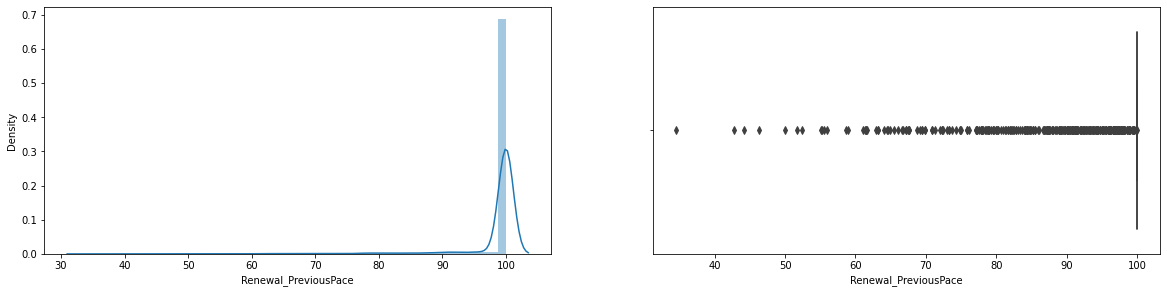

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    3057.000000
mean        0.733026
std         0.243747
min         0.000000
25%         0.560000
50%         0.680000
75%         0.910000
max         2.150000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

0.53    117
0.52    115
0.51    103
0.60     98
0.56     87
       ... 
1.62      1
0.05      1
1.58      1
1.46      1
1.76      1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 162, dtype: int64 

Unique number of attribute : 

[0.61 0.7  0.6  0.55 0.54 0.53 0.96 0.57 0.84 0.76 0.46 0.66 0.74 1.2
 0.56 0.5  0.12 0.63 1.52 0.47 0.64 0.72 0.51 0.71 1.12 0.62 0.8  0.94
 0.69 0.04 1.11 1.28 0.37 0.67 0.59 1.   1.13 0.65 0.22 1.02 0.88 0.77
 0.18 0.75 0.97 0.73 1.36 0.52 0.98 0.58 0.92 1.01 0.42 0.21 1.03 0.87
 0.45 0.83 0.68 0.91 0.78 1.17 0.81 1.16 0.82 0.79 0.99 0.44 0.32 0.9
 1.14 0.86 1.21 0.13 0.89 0.41 1.69 0.93 0.2  0.28 1.04 0.95 1.15 0.27
 1

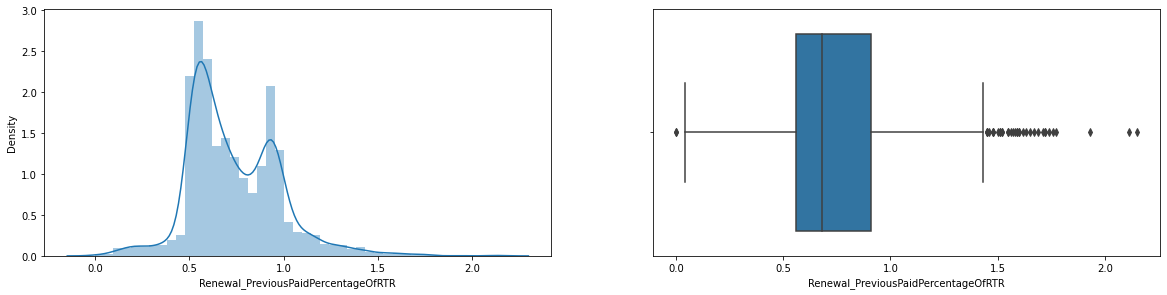

attribute_name : Renewal_CountPreviousDeals
Description of attribute : 

count    3058.000000
mean        2.188031
std         1.705202
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: Renewal_CountPreviousDeals, dtype: float64 

Value counts of attribute : 

1.0     1482
2.0      712
3.0      363
4.0      196
5.0      134
6.0       74
7.0       43
8.0       22
9.0       13
10.0      11
11.0       5
14.0       1
12.0       1
13.0       1
Name: Renewal_CountPreviousDeals, dtype: int64 

Unique number of attribute : 

[ 1.  2.  5.  3.  4.  7.  6.  8. 14. 10.  9. 12. 11. 13.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



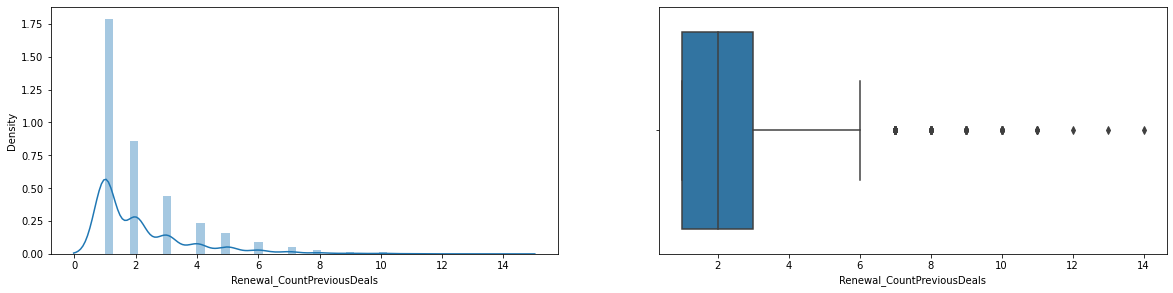

attribute_name : Renewal_PreviousCountBounces
Description of attribute : 

count    3058.000000
mean        2.838784
std         7.358512
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        83.000000
Name: Renewal_PreviousCountBounces, dtype: float64 

Value counts of attribute : 

0.0     1906
1.0      266
2.0      176
3.0      134
4.0       92
5.0       75
6.0       46
7.0       42
9.0       29
8.0       28
10.0      24
12.0      22
11.0      20
14.0      15
15.0      14
20.0      14
16.0      12
13.0      11
18.0      10
17.0      10
24.0       8
21.0       8
36.0       7
25.0       7
19.0       6
29.0       6
32.0       5
23.0       5
27.0       5
22.0       5
28.0       5
30.0       4
26.0       4
42.0       3
33.0       3
61.0       3
43.0       3
35.0       2
38.0       2
49.0       2
56.0       2
54.0       2
34.0       1
79.0       1
63.0       1
31.0       1
45.0       1
37.0       1
75.0       1
44.0       1
41.0       1
60.0       

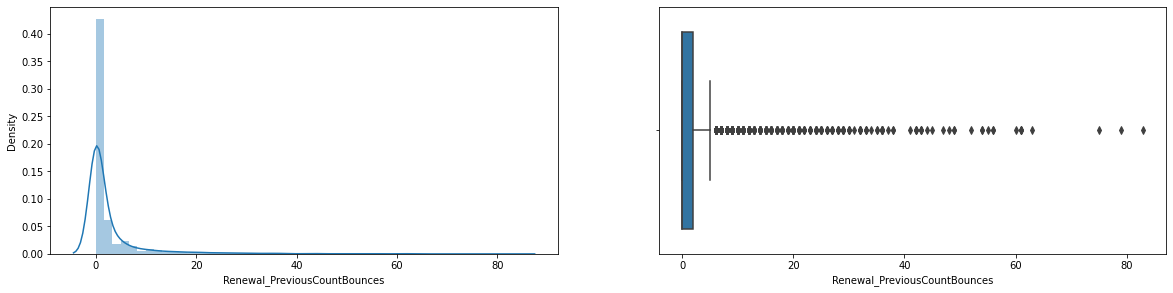

attribute_name : Renewal_PreviousPosition
Description of attribute : 

count    3058.000000
mean        2.014716
std         1.335499
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Renewal_PreviousPosition, dtype: float64 

Value counts of attribute : 

1.0     1428
2.0      827
3.0      405
4.0      258
5.0       78
6.0       38
7.0       11
9.0        3
10.0       3
8.0        2
13.0       2
12.0       1
15.0       1
11.0       1
Name: Renewal_PreviousPosition, dtype: int64 

Unique number of attribute : 

[ 1.  3.  2.  5.  6.  4.  7.  8.  9. 12. 15. 10. 13. 11.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



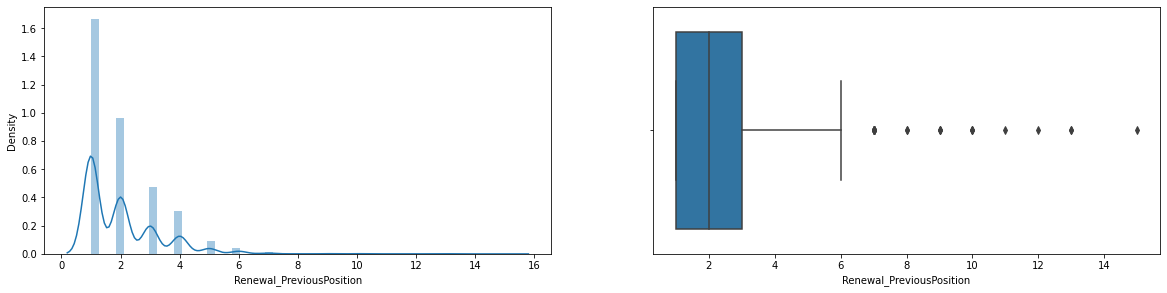

attribute_name : Renewal_PreviousHBwLCF
Description of attribute : 

count     3058.000000
mean        31.388878
std        219.123701
min          0.000000
25%          8.492500
50%         19.560000
75%         33.560000
max      11539.840000
Name: Renewal_PreviousHBwLCF, dtype: float64 

Value counts of attribute : 

0.00      598
20.40       5
17.66       5
12.23       4
23.74       4
         ... 
25.84       1
136.35      1
27.81       1
24.58       1
34.77       1
Name: Renewal_PreviousHBwLCF, Length: 1988, dtype: int64 

Unique number of attribute : 

[ 0.    4.87 65.94 ... 88.6  89.19 34.77] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



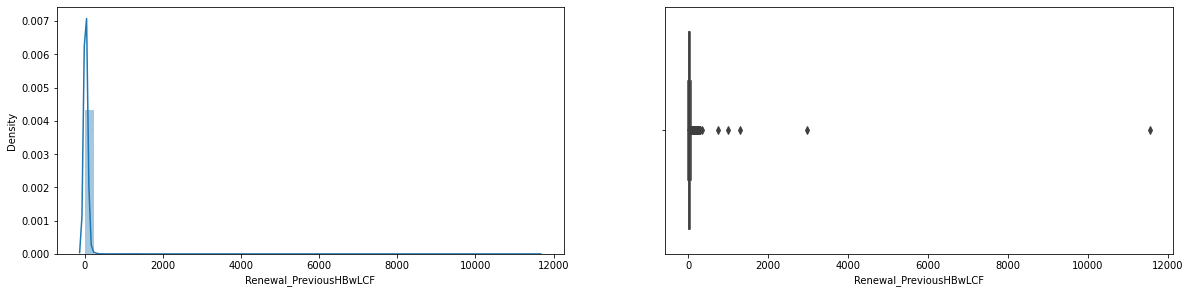

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    2.587000e+03
mean     6.504857e+04
std      3.031414e+05
min     -9.592692e+04
25%      1.375408e+04
50%      2.474676e+04
75%      5.024414e+04
max      1.241704e+07
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

17772.00     2
283083.33    2
8119.67      2
0.00         2
26512.00     2
            ..
7924.00      1
7787.00      1
122250.00    1
7342.00      1
18955.78     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 2579, dtype: int64 

Unique number of attribute : 

[     nan 51353.   11590.67 ... 30209.   20773.67 18955.78] 

Missing values in attribute : 

471 

Missing values in attribute_% : 

15.40222367560497 



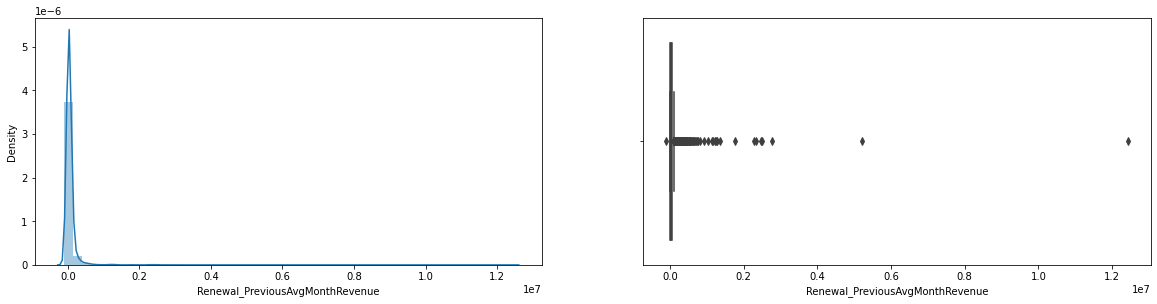

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count    2.587000e+03
mean     1.090239e+04
std      6.765070e+04
min     -1.375330e+05
25%      1.502830e+03
50%      3.404000e+03
75%      7.658640e+03
max      3.129067e+06
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

1146.67     2
3610.33     2
8484.33     2
963.67      2
1460.02     2
           ..
147.50      1
3082.67     1
4619.33     1
18277.39    1
2299.61     1
Name: Renewal_PreviousAvgDailyBalance, Length: 2573, dtype: int64 

Unique number of attribute : 

[    nan 2511.   3730.33 ...  760.   2415.67 2299.61] 

Missing values in attribute : 

471 

Missing values in attribute_% : 

15.40222367560497 



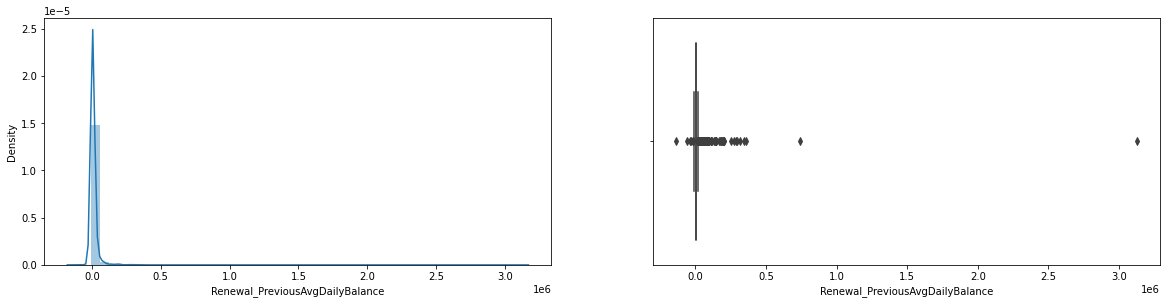

attribute_name : Renewal_TwoWeekBounces
Description of attribute : 

count    3058.000000
mean        0.035644
std         0.223800
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Renewal_TwoWeekBounces, dtype: float64 

Value counts of attribute : 

0.0    2969
1.0      72
2.0      15
4.0       1
3.0       1
Name: Renewal_TwoWeekBounces, dtype: int64 

Unique number of attribute : 

[1. 0. 4. 2. 3.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



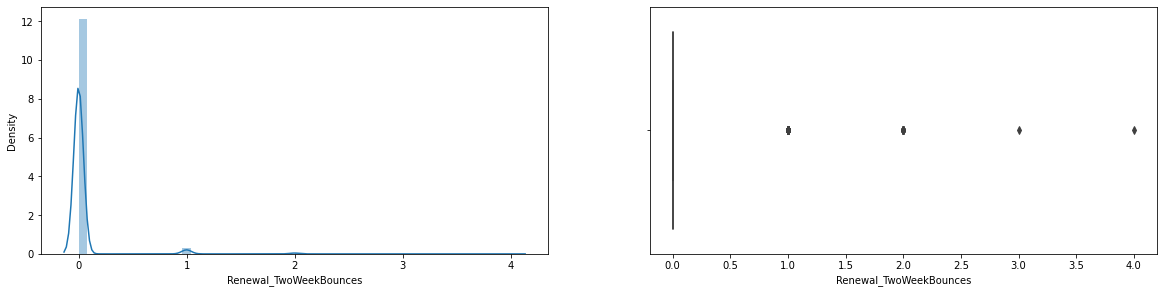

attribute_name : NumberOfBankStatements
Description of attribute : 

count    3058.000000
mean        3.017986
std         0.920811
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: NumberOfBankStatements, dtype: float64 

Value counts of attribute : 

3.0    1644
4.0     761
2.0     320
1.0     218
5.0      79
0.0      36
Name: NumberOfBankStatements, dtype: int64 

Unique number of attribute : 

[3. 2. 0. 4. 1. 5.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



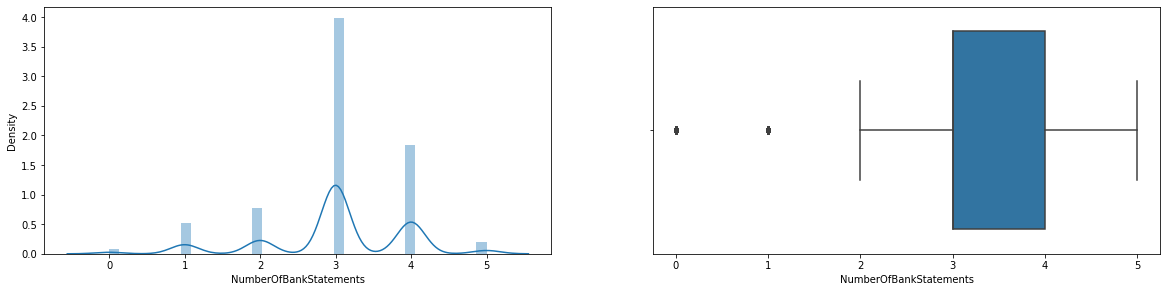

attribute_name : BankStatement_MA_OverdraftDays
Description of attribute : 

count    3022.000000
mean        1.228193
std         2.587433
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        25.000000
Name: BankStatement_MA_OverdraftDays, dtype: float64 

Value counts of attribute : 

0.000000     1781
1.000000      128
0.333333       85
0.250000       82
2.000000       81
             ... 
11.666666       1
10.200000       1
2.400000        1
11.750000       1
11.333333       1
Name: BankStatement_MA_OverdraftDays, Length: 104, dtype: int64 

Unique number of attribute : 

[ 2.        0.333333  0.        3.        5.        4.666666  0.666666
 10.666666  1.        2.333333  8.666666  6.666666  1.333333  1.666666
  4.5            nan  4.        4.333333 11.5       9.        7.
  7.333333  5.666666 11.        2.5       3.666666  8.333333  7.666666
  8.        1.5       2.666666 13.666666  3.333333  3.5       6.
 12.       11.666666  6.333333  

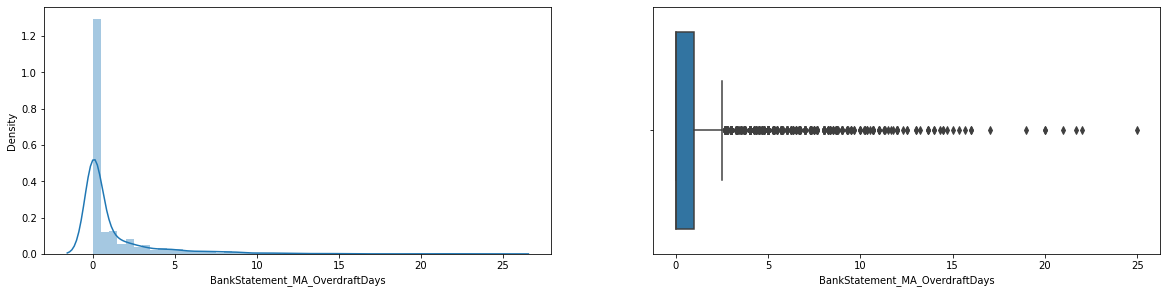

attribute_name : BankStatement_MA_NumReturnItems
Description of attribute : 

count    3022.000000
mean        1.049912
std         3.367273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666666
max        98.333333
Name: BankStatement_MA_NumReturnItems, dtype: float64 

Value counts of attribute : 

0.000000     1973
0.333333      120
1.000000      105
0.666666       73
0.500000       72
             ... 
22.333333       1
1.200000        1
13.333333       1
24.000000       1
13.250000       1
Name: BankStatement_MA_NumReturnItems, Length: 100, dtype: int64 

Unique number of attribute : 

[ 1.333333  0.        2.333333  6.        1.666666  1.        2.666666
  0.333333  3.666666  3.        4.666666  5.666666  2.        2.5
       nan  7.333333 12.333333  6.5      20.666666  0.5       5.333333
  0.666666  4.        1.5       3.333333  4.333333  9.333333  7.
 10.        5.5      11.333333  6.333333 15.333333  7.666666 13.333333
  7.5       9.       12.    

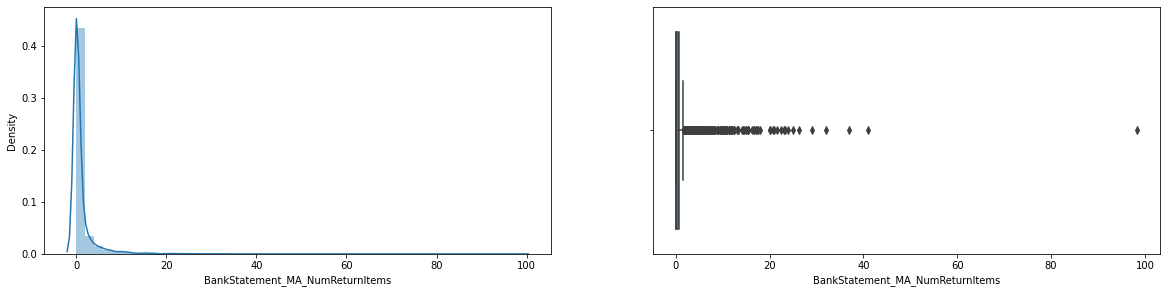

attribute_name : Credit_Score__c
Description of attribute : 

count    3047.000000
mean      549.924516
std       153.120028
min         0.000000
25%       532.000000
50%       578.000000
75%       621.500000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      159
595.0     32
550.0     29
1.0       28
578.0     27
        ... 
449.0      1
800.0      1
734.0      1
768.0      1
714.0      1
Name: Credit_Score__c, Length: 319, dtype: int64 

Unique number of attribute : 

[533. 528. 619. 659.   0. 524. 636. 647. 615. 531. 467. 522. 610. 640.
 671. 509. 572. 543. 558. 483. 699. 620. 686. 565. 658. 545. 546. 541.
 504. 586. 493. 673. 563. 527. 621. 623. 739. 684. 611. 465. 535. 600.
 552. 668. 500. 576. 515. 539. 654. 746.  nan 476. 525. 518. 463. 491.
 440. 508. 629. 523. 464. 630. 607. 538. 438. 554. 472. 485. 570. 639.
 644. 646. 613. 653. 498. 526. 688. 652. 497. 612. 516. 582. 577. 627.
 573. 802. 510. 585. 583. 590. 562. 567. 569. 680

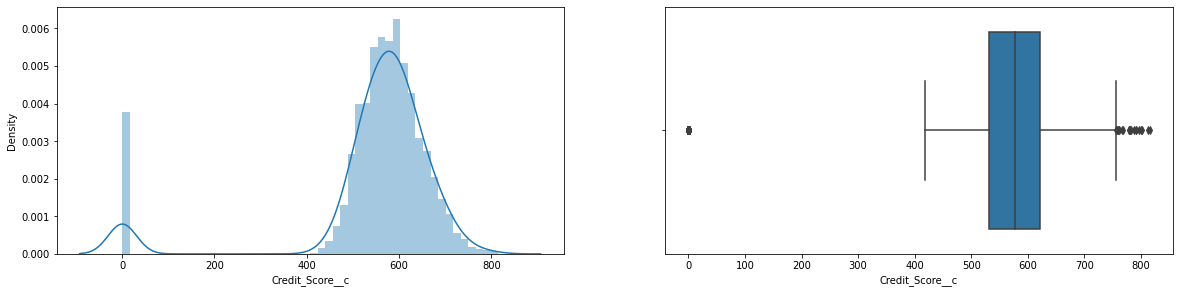

attribute_name : Time_in_Business__c
Description of attribute : 

count    3058.000000
mean        7.621887
std        10.133375
min         0.010000
25%         1.922500
50%         4.070000
75%         9.445000
max       115.290000
Name: Time_in_Business__c, dtype: float64 

Value counts of attribute : 

2.19     13
1.32     12
0.92     11
0.84     11
2.09     10
         ..
21.53     1
44.61     1
5.85      1
27.14     1
13.03     1
Name: Time_in_Business__c, Length: 1387, dtype: int64 

Unique number of attribute : 

[18.51  2.02  0.72 ... 22.13 11.94 13.03] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



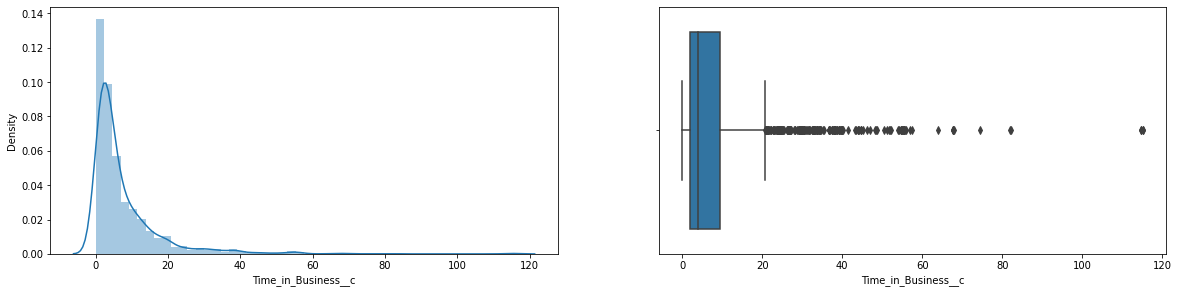

attribute_name : HB_with_LCF_Payment__c
Description of attribute : 

count     3058.000000
mean        34.179225
std        218.320196
min          0.000000
25%         11.295000
50%         20.665000
75%         35.445000
max      11539.840000
Name: HB_with_LCF_Payment__c, dtype: float64 

Value counts of attribute : 

0.00     384
10.26      6
16.10      5
9.71       5
20.40      4
        ... 
22.05      1
11.41      1
47.24      1
99.73      1
12.01      1
Name: HB_with_LCF_Payment__c, Length: 2121, dtype: int64 

Unique number of attribute : 

[223.08  11.12   0.   ...  21.13  16.75  12.01] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



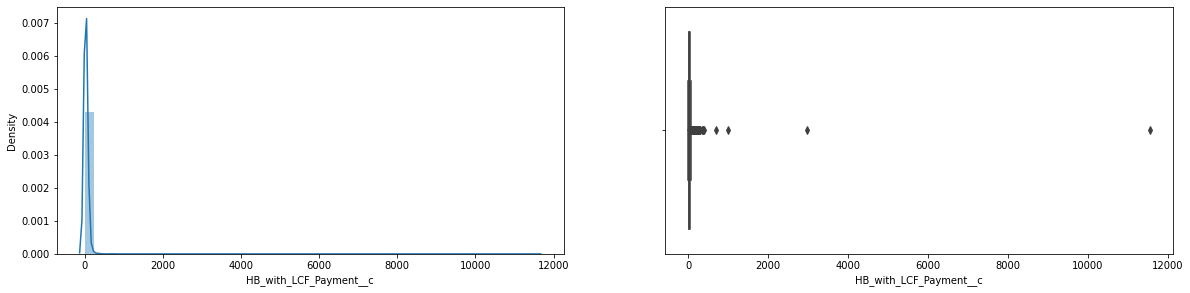

attribute_name : AvgMonthlydeposits
Description of attribute : 

count    3.022000e+03
mean     7.414507e+04
std      2.951533e+05
min     -3.078493e+03
25%      1.588236e+04
50%      2.804607e+04
75%      5.816592e+04
max      1.241704e+07
Name: AvgMonthlydeposits, dtype: float64 

Value counts of attribute : 

26512.000000     2
0.000000         2
13669.000000     2
63473.610000     2
19916.260000     1
                ..
55986.150000     1
12857.637500     1
32982.188000     1
22385.460000     1
460906.546666    1
Name: AvgMonthlydeposits, Length: 3018, dtype: int64 

Unique number of attribute : 

[ 22265.236666  22577.496666   7753.01     ...  39065.9625   100945.7775
 460906.546666] 

Missing values in attribute : 

36 

Missing values in attribute_% : 

1.1772400261608895 



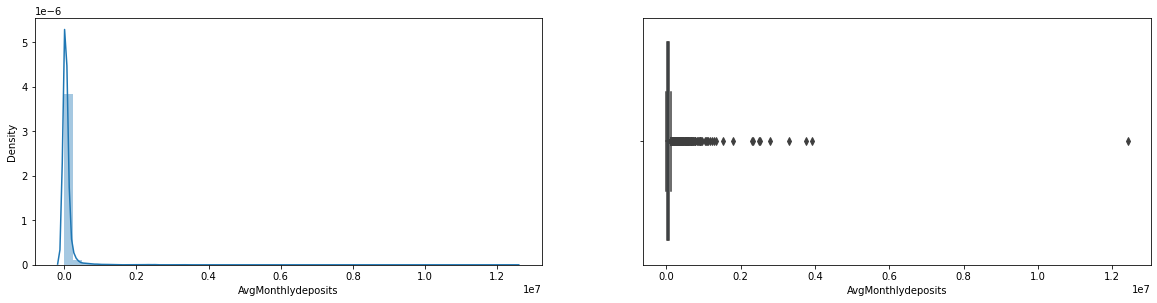

attribute_name : AvgDailybalance
Description of attribute : 

count    3.022000e+03
mean     1.206521e+04
std      6.877781e+04
min     -1.365124e+05
25%      1.554868e+03
50%      3.612000e+03
75%      8.427426e+03
max      3.129067e+06
Name: AvgDailybalance, dtype: float64 

Value counts of attribute : 

2036.000000     2
1404.666666     2
1140.333333     2
2916.666666     2
1930.666666     2
               ..
6536.456000     1
1055.165000     1
8355.920000     1
1911.472500     1
22120.676666    1
Name: AvgDailybalance, Length: 3013, dtype: int64 

Unique number of attribute : 

[ 4292.88      1752.743333   650.333333 ...  5225.4925   16153.2425
 22120.676666] 

Missing values in attribute : 

36 

Missing values in attribute_% : 

1.1772400261608895 



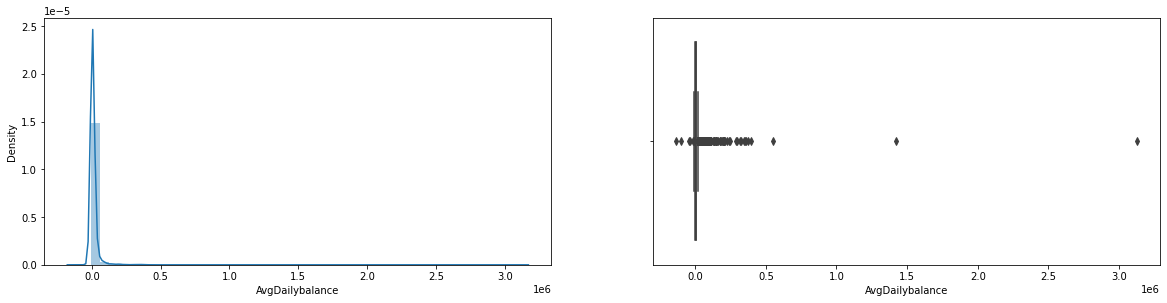

attribute_name : FundedAmount
Description of attribute : 

count       3058.000000
mean       21594.535853
std        48074.914902
min         1709.000000
25%         6000.000000
50%        10000.000000
75%        20000.000000
max      1000000.000000
Name: FundedAmount, dtype: float64 

Value counts of attribute : 

10000.0     339
5000.0      265
15000.0     226
6000.0      209
8000.0      192
           ... 
15950.0       1
4300.0        1
258157.0      1
4400.0        1
190000.0      1
Name: FundedAmount, Length: 165, dtype: int64 

Unique number of attribute : 

[   8000.      5000.     13000.     14000.      7000.     10000.
   15000.      3000.    170000.     27000.      9000.      4000.
   30000.      6000.     22000.     16000.     11000.      3300.
  110000.    100000.     22500.     40000.    275000.      2000.
   24000.     12000.    285000.     16500.     18000.      8500.
   20000.      4500.      6500.     80000.     31000.      5100.
  375000.      4600.     17000.     5

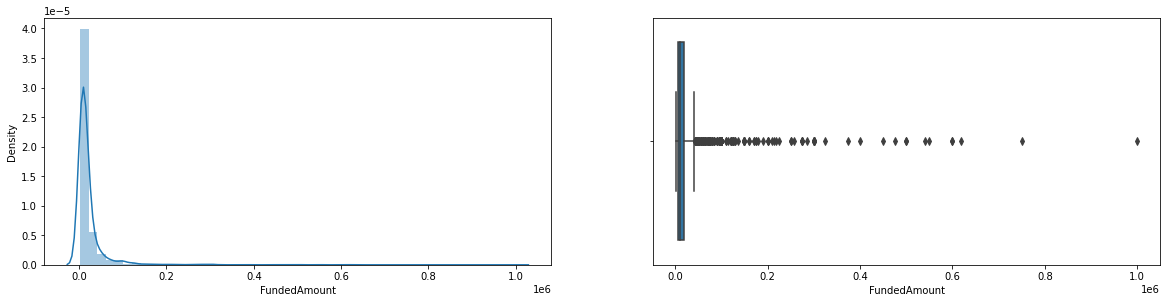

attribute_name : Paybackamount
Description of attribute : 

count    3.058000e+03
mean     3.186630e+04
std      6.977832e+04
min      2.546410e+03
25%      8.940000e+03
50%      1.490000e+04
75%      2.980000e+04
max      1.400000e+06
Name: Paybackamount, dtype: float64 

Value counts of attribute : 

14900.0     322
7450.0      257
22350.0     206
8940.0      204
11920.0     188
           ... 
298750.0      1
88800.0       1
2682.0        1
11473.0       1
66150.0       1
Name: Paybackamount, Length: 316, dtype: int64 

Unique number of attribute : 

[  11920.      7450.      7300.     19370.     20860.     10430.
   14900.     22350.      4470.    253300.     40230.     13410.
    5960.     44700.      8940.     32780.     23840.     16390.
    4917.    163900.    145000.     33525.    149000.     59600.
  409750.      2980.     35760.     17880.    424650.     24585.
   26820.     17767.     29800.      6705.      9685.    119200.
  146000.     46190.      7599.    558750.      68

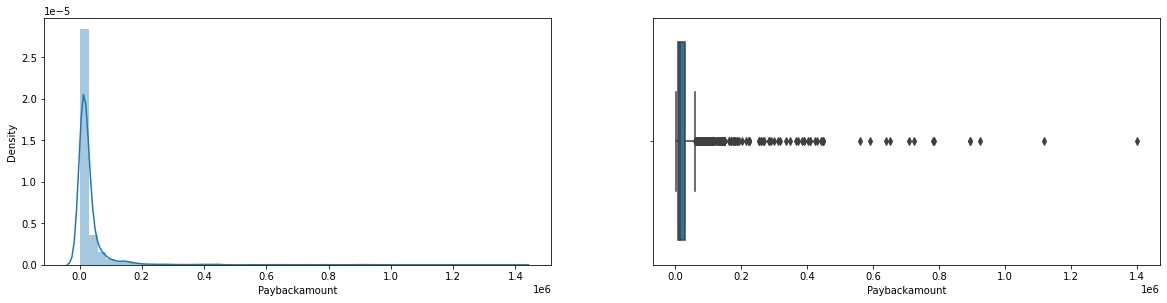

attribute_name : WriteOff_YN
Description of attribute : 

count    3058.000000
mean        0.253434
std         0.435048
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: WriteOff_YN, dtype: float64 

Value counts of attribute : 

0.0    2283
1.0     775
Name: WriteOff_YN, dtype: int64 

Unique number of attribute : 

[0. 1.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



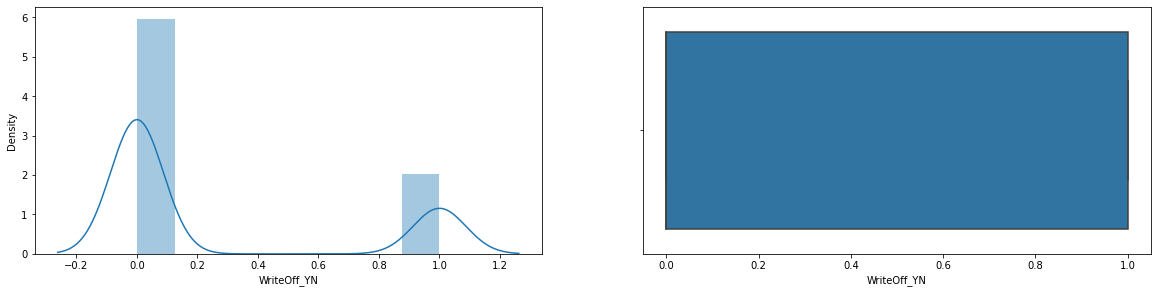

attribute_name : FundedWriteOffAmount_Gross
Description of attribute : 

count       775.000000
mean       9326.543084
std       23502.310275
min           0.000000
25%        1107.020000
50%        3713.020000
75%        8747.725000
max      317759.340000
Name: FundedWriteOffAmount_Gross, dtype: float64 

Value counts of attribute : 

0.00        120
2404.00       2
9263.96       1
2836.56       1
4097.00       1
           ... 
1665.46       1
11222.00      1
3232.00       1
3157.00       1
778.22        1
Name: FundedWriteOffAmount_Gross, Length: 655, dtype: int64 

Unique number of attribute : 

[          nan 9.2639600e+03 8.9170000e+03 1.4900000e+03 2.6650000e+03
 3.1030000e+03 1.2400100e+05 1.8393320e+04 1.1999250e+04 2.2980000e+03
 6.4850000e+03 3.4500000e+03 1.5462000e+04 0.0000000e+00 3.0822000e+04
 8.3200000e+02 6.0200000e+02 1.0921000e+04 3.8580000e+03 1.2320000e+03
 1.4466000e+04 4.2510000e+03 2.2645000e+03 4.3290000e+03 2.1490000e+03
 3.5030000e+03 9.4727400e+03 3.9680000

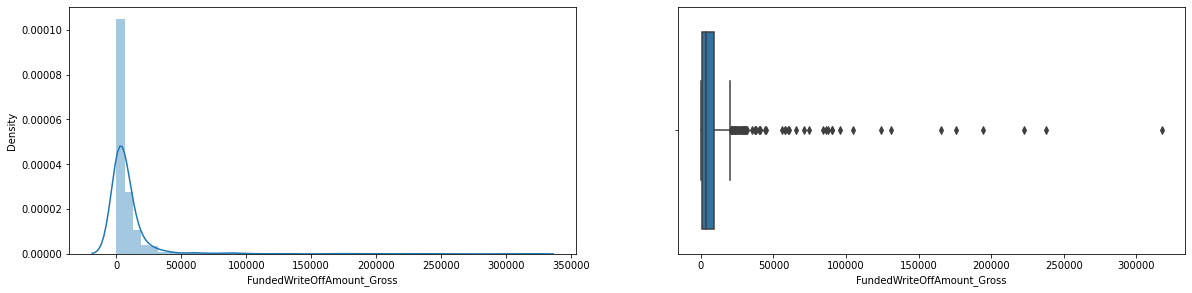

attribute_name : WOGross_AdvanceBalance
Description of attribute : 

count      3058.000000
mean      10214.305438
std       31517.412889
min           0.000000
25%           0.000000
50%        3427.000000
75%        8890.865000
max      700000.000000
Name: WOGross_AdvanceBalance, dtype: float64 

Value counts of attribute : 

0.00        950
3874.00       4
6705.00       4
7152.00       4
0.10          4
           ... 
1472.48       1
47689.45      1
4313.24       1
24484.40      1
302.50        1
Name: WOGross_AdvanceBalance, Length: 2015, dtype: int64 

Unique number of attribute : 

[    0.   15633.96 15777.   ...  3228.22  3255.     302.5 ] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



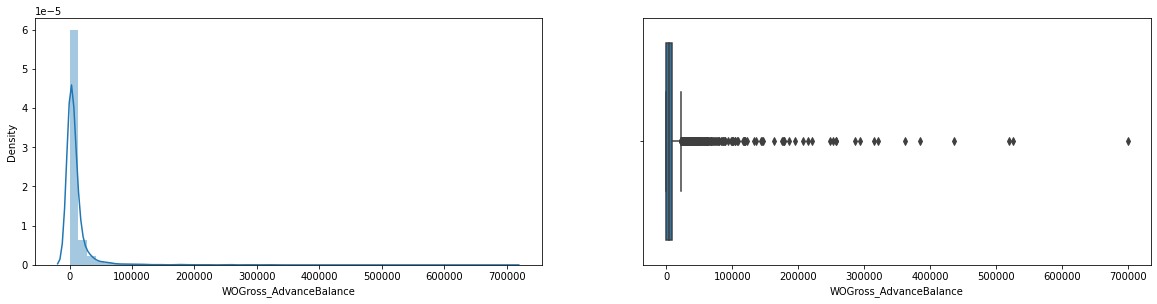

attribute_name : NetWO
Description of attribute : 

count       775.000000
mean       7596.540581
std       20791.087722
min           0.000000
25%           0.000000
50%        2262.380000
75%        7446.170000
max      317759.340000
Name: NetWO, dtype: float64 

Value counts of attribute : 

0.00        258
2404.00       2
5794.64       1
6103.09       1
31163.22      1
           ... 
10559.00      1
2104.00       1
4406.00       1
3232.00       1
778.22        1
Name: NetWO, Length: 517, dtype: int64 

Unique number of attribute : 

[          nan 0.0000000e+00 8.9170000e+03 1.4900000e+03 2.6650000e+03
 3.1030000e+03 8.9001000e+04 1.8393320e+04 1.1999250e+04 2.2980000e+03
 3.4500000e+03 1.5262000e+04 3.0822000e+04 8.3200000e+02 1.0921000e+04
 1.2320000e+03 1.0723320e+04 4.2510000e+03 2.2645000e+03 2.1490000e+03
 3.5030000e+03 4.7780000e+03 5.5527810e+04 8.7426000e+04 1.9616000e+04
 7.9640000e+03 3.4250000e+03 2.9910000e+04 5.1510000e+03 1.9843920e+04
 1.5095600e+03 2.6410000e+03 3

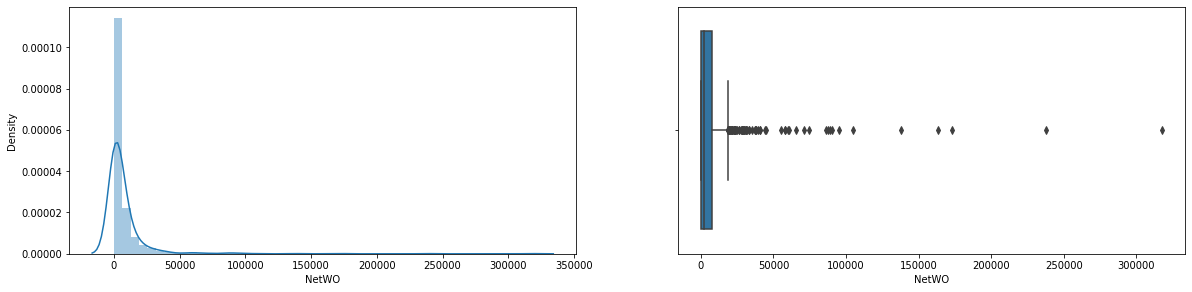

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    3022.000000
mean        0.945163
std         2.234658
min         0.000000
25%         0.000000
50%         0.000000
75%         0.750000
max        34.000000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     1866
0.333333      143
1.000000      130
0.250000       84
0.666666       79
             ... 
8.500000        1
6.250000        1
13.333333       1
14.666666       1
7.750000        1
Name: Avg_ReturnItemdays, Length: 81, dtype: int64 

Unique number of attribute : 

[ 1.        0.        2.        4.        4.333333  0.333333  1.666666
  6.666666  0.666666  7.       13.        1.333333  2.666666  2.333333
 11.333333  3.        2.5            nan  8.333333  7.666666  0.5
  5.333333  8.666666  4.5       3.333333  5.666666  9.666666  4.666666
  6.333333  6.        5.        9.333333 10.        9.        8.
  6.5      11.       13.333333 12.333333  5.25      3.666666 15.
  3

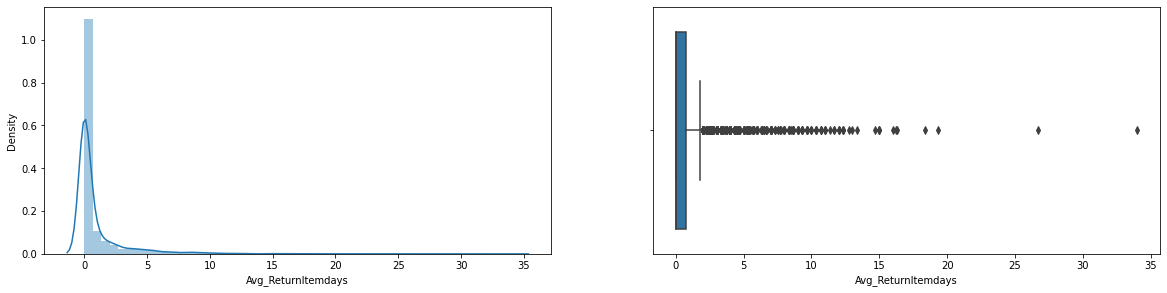

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    2417.000000
mean        1.292925
std         2.974965
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        34.000000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     1674
1.0      207
2.0      135
3.0      111
5.0       50
4.0       48
7.0       37
6.0       32
8.0       25
9.0       20
10.0      18
11.0      15
12.0      13
14.0       8
16.0       6
13.0       5
17.0       3
15.0       3
20.0       2
34.0       2
24.0       1
22.0       1
18.0       1
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[ 0. nan  4.  9.  5.  6.  1.  3.  8. 10.  2.  7. 11. 12. 13. 16. 14. 24.
 17. 15. 22. 18. 20. 34.] 

Missing values in attribute : 

641 

Missing values in attribute_% : 

20.96141268803139 



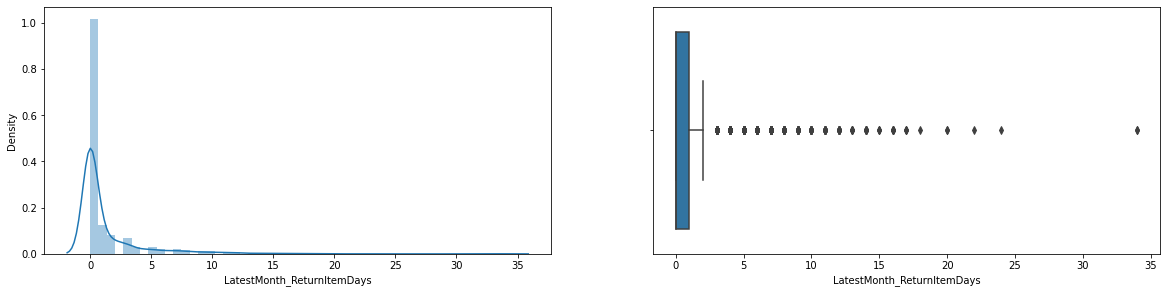

attribute_name : PctChangeInReveune
Description of attribute : 

count    2551.000000
mean       -1.116813
std        35.162111
min     -1572.231817
25%        -0.126806
50%         0.086233
75%         0.304289
max         7.308505
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

 0.000000    6
 1.000000    2
 0.166882    1
 0.471686    1
 0.145975    1
            ..
 0.321752    1
 0.032190    1
-0.677502    1
-0.166517    1
 0.567268    1
Name: PctChangeInReveune, Length: 2545, dtype: int64 

Unique number of attribute : 

[       nan 0.1668823  0.01001374 ... 0.00664638 0.13117763 0.56726799] 

Missing values in attribute : 

507 

Missing values in attribute_% : 

16.57946370176586 



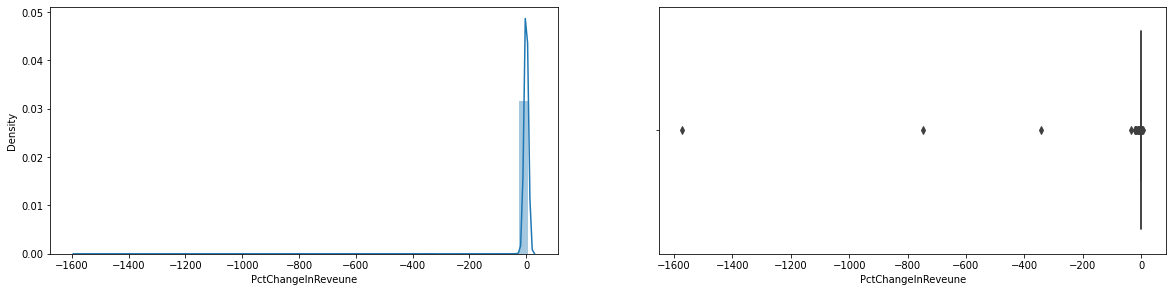

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    3020.000000
mean        0.265425
std         2.735983
min        -0.195982
25%         0.063457
50%         0.120715
75%         0.219422
max       145.707261
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.110013    2
0.088927    1
0.311961    1
0.079558    1
0.137812    1
           ..
0.036021    1
0.073762    1
0.198182    1
0.047136    1
0.047994    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 3019, dtype: int64 

Unique number of attribute : 

[0.19280637 0.07763216 0.08388097 ... 0.1337607  0.16001897 0.04799385] 

Missing values in attribute : 

38 

Missing values in attribute_% : 

1.2426422498364944 



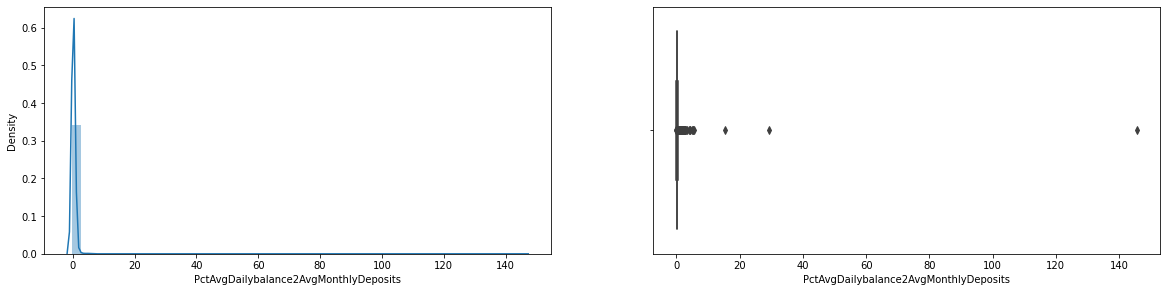

In [ ]:
for col in numerical_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

NetWO                                    74.656638
FundedWriteOffAmount_Gross               74.656638
LatestMonth_ReturnItemDays               20.961413
PctChangeInReveune                       16.579464
Renewal_PreviousAvgMonthRevenue          15.402224
Renewal_PreviousAvgDailyBalance          15.402224
PctAvgDailybalance2AvgMonthlyDeposits     1.242642
Avg_ReturnItemdays                        1.177240
AvgDailybalance                           1.177240
AvgMonthlydeposits                        1.177240
BankStatement_MA_OverdraftDays            1.177240
BankStatement_MA_NumReturnItems           1.177240
Credit_Score__c                           0.359712
Renewal_PreviousPace                      0.294310
Renewal_PreviousPaidPercentageOfRTR       0.032701
OpportunityID                             0.000000
WOGross_AdvanceBalance                    0.000000
Paybackamount                             0.000000
WriteOff_YN                               0.000000
Time_in_Business__c            

# Missing Values

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    2417.000000
mean        1.292925
std         2.974965
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        34.000000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     1674
1.0      207
2.0      135
3.0      111
5.0       50
4.0       48
7.0       37
6.0       32
8.0       25
9.0       20
10.0      18
11.0      15
12.0      13
14.0       8
16.0       6
13.0       5
17.0       3
15.0       3
20.0       2
34.0       2
24.0       1
22.0       1
18.0       1
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[ 0. nan  4.  9.  5.  6.  1.  3.  8. 10.  2.  7. 11. 12. 13. 16. 14. 24.
 17. 15. 22. 18. 20. 34.] 

Missing values in attribute : 

641 

Missing values in attribute_% : 

20.96141268803139 



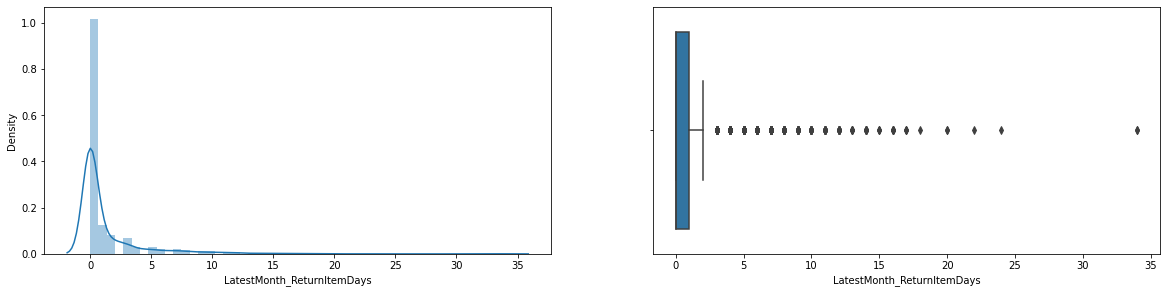

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    3057.000000
mean        0.733026
std         0.243747
min         0.000000
25%         0.560000
50%         0.680000
75%         0.910000
max         2.150000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

0.53    117
0.52    115
0.51    103
0.60     98
0.56     87
       ... 
1.62      1
0.05      1
1.58      1
1.46      1
1.76      1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 162, dtype: int64 

Unique number of attribute : 

[0.61 0.7  0.6  0.55 0.54 0.53 0.96 0.57 0.84 0.76 0.46 0.66 0.74 1.2
 0.56 0.5  0.12 0.63 1.52 0.47 0.64 0.72 0.51 0.71 1.12 0.62 0.8  0.94
 0.69 0.04 1.11 1.28 0.37 0.67 0.59 1.   1.13 0.65 0.22 1.02 0.88 0.77
 0.18 0.75 0.97 0.73 1.36 0.52 0.98 0.58 0.92 1.01 0.42 0.21 1.03 0.87
 0.45 0.83 0.68 0.91 0.78 1.17 0.81 1.16 0.82 0.79 0.99 0.44 0.32 0.9
 1.14 0.86 1.21 0.13 0.89 0.41 1.69 0.93 0.2  0.28 1.04 0.95 1.15 0.27
 1

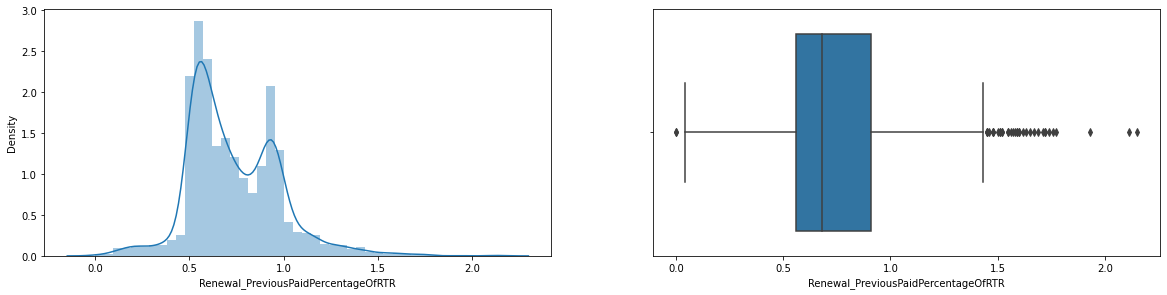

attribute_name : PctChangeInReveune
Description of attribute : 

count    2551.000000
mean       -1.116813
std        35.162111
min     -1572.231817
25%        -0.126806
50%         0.086233
75%         0.304289
max         7.308505
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

 0.000000    6
 1.000000    2
 0.166882    1
 0.471686    1
 0.145975    1
            ..
 0.321752    1
 0.032190    1
-0.677502    1
-0.166517    1
 0.567268    1
Name: PctChangeInReveune, Length: 2545, dtype: int64 

Unique number of attribute : 

[       nan 0.1668823  0.01001374 ... 0.00664638 0.13117763 0.56726799] 

Missing values in attribute : 

507 

Missing values in attribute_% : 

16.57946370176586 



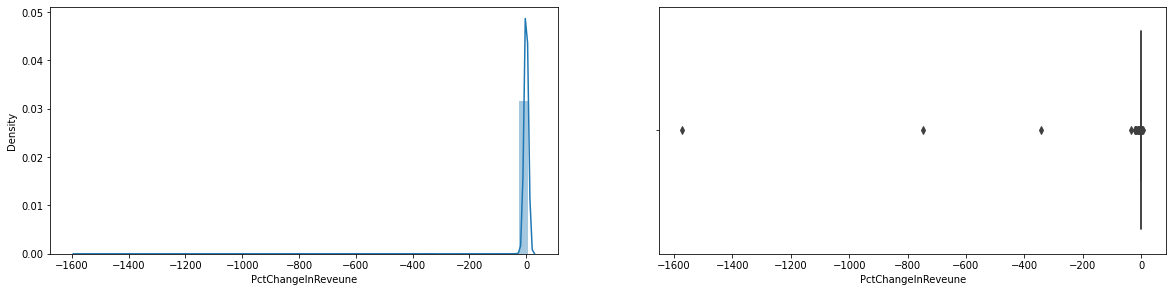

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count    2.587000e+03
mean     1.090239e+04
std      6.765070e+04
min     -1.375330e+05
25%      1.502830e+03
50%      3.404000e+03
75%      7.658640e+03
max      3.129067e+06
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

1146.67     2
3610.33     2
8484.33     2
963.67      2
1460.02     2
           ..
147.50      1
3082.67     1
4619.33     1
18277.39    1
2299.61     1
Name: Renewal_PreviousAvgDailyBalance, Length: 2573, dtype: int64 

Unique number of attribute : 

[    nan 2511.   3730.33 ...  760.   2415.67 2299.61] 

Missing values in attribute : 

471 

Missing values in attribute_% : 

15.40222367560497 



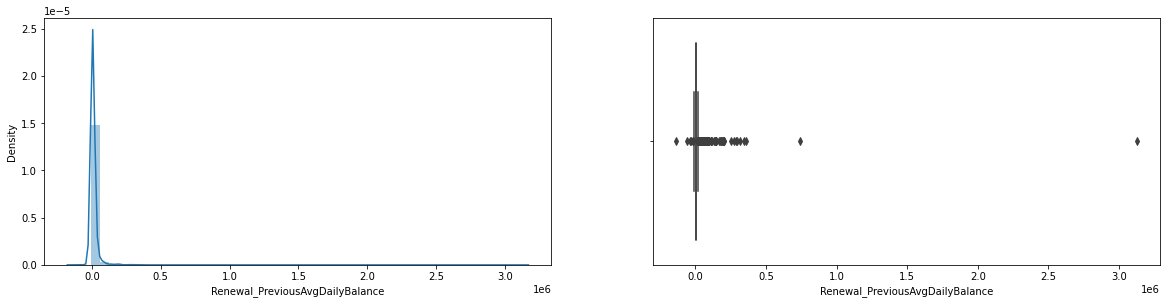

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    2.587000e+03
mean     6.504857e+04
std      3.031414e+05
min     -9.592692e+04
25%      1.375408e+04
50%      2.474676e+04
75%      5.024414e+04
max      1.241704e+07
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

17772.00     2
283083.33    2
8119.67      2
0.00         2
26512.00     2
            ..
7924.00      1
7787.00      1
122250.00    1
7342.00      1
18955.78     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 2579, dtype: int64 

Unique number of attribute : 

[     nan 51353.   11590.67 ... 30209.   20773.67 18955.78] 

Missing values in attribute : 

471 

Missing values in attribute_% : 

15.40222367560497 



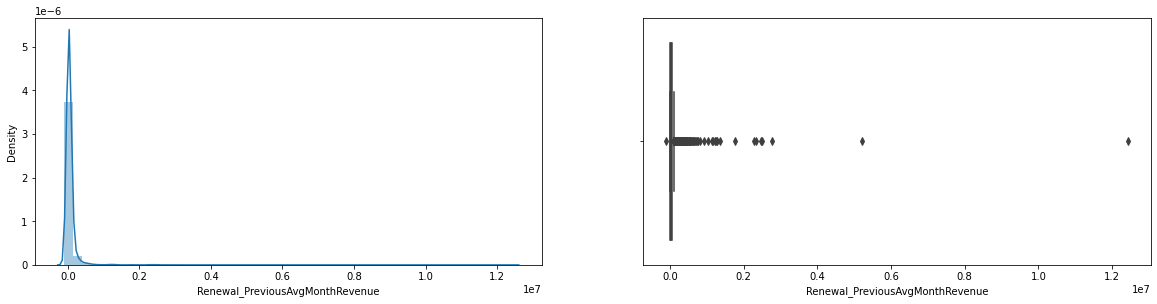

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    3020.000000
mean        0.265425
std         2.735983
min        -0.195982
25%         0.063457
50%         0.120715
75%         0.219422
max       145.707261
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.110013    2
0.088927    1
0.311961    1
0.079558    1
0.137812    1
           ..
0.036021    1
0.073762    1
0.198182    1
0.047136    1
0.047994    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 3019, dtype: int64 

Unique number of attribute : 

[0.19280637 0.07763216 0.08388097 ... 0.1337607  0.16001897 0.04799385] 

Missing values in attribute : 

38 

Missing values in attribute_% : 

1.2426422498364944 



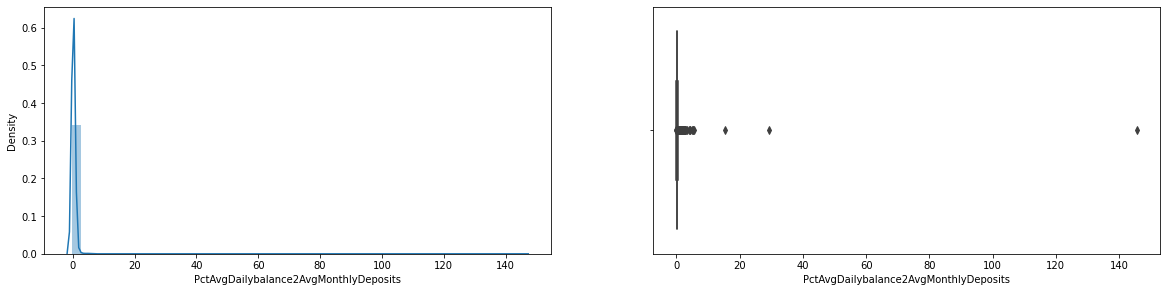

attribute_name : BankStatement_MA_OverdraftDays
Description of attribute : 

count    3022.000000
mean        1.228193
std         2.587433
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        25.000000
Name: BankStatement_MA_OverdraftDays, dtype: float64 

Value counts of attribute : 

0.000000     1781
1.000000      128
0.333333       85
0.250000       82
2.000000       81
             ... 
11.666666       1
10.200000       1
2.400000        1
11.750000       1
11.333333       1
Name: BankStatement_MA_OverdraftDays, Length: 104, dtype: int64 

Unique number of attribute : 

[ 2.        0.333333  0.        3.        5.        4.666666  0.666666
 10.666666  1.        2.333333  8.666666  6.666666  1.333333  1.666666
  4.5            nan  4.        4.333333 11.5       9.        7.
  7.333333  5.666666 11.        2.5       3.666666  8.333333  7.666666
  8.        1.5       2.666666 13.666666  3.333333  3.5       6.
 12.       11.666666  6.333333  

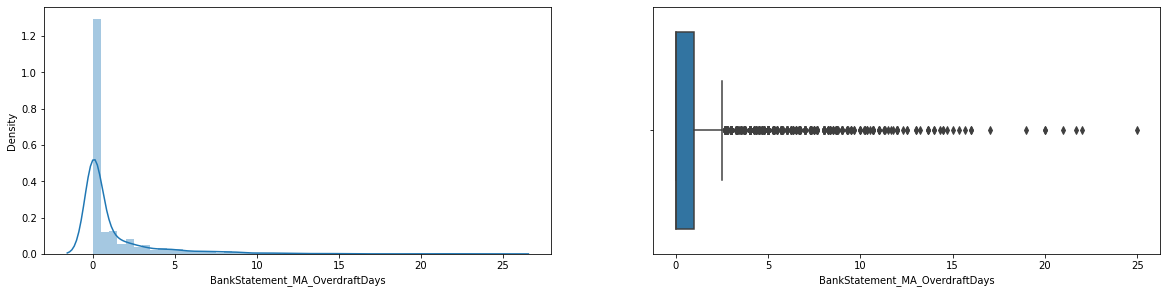

attribute_name : AvgMonthlydeposits
Description of attribute : 

count    3.022000e+03
mean     7.414507e+04
std      2.951533e+05
min     -3.078493e+03
25%      1.588236e+04
50%      2.804607e+04
75%      5.816592e+04
max      1.241704e+07
Name: AvgMonthlydeposits, dtype: float64 

Value counts of attribute : 

26512.000000     2
0.000000         2
13669.000000     2
63473.610000     2
19916.260000     1
                ..
55986.150000     1
12857.637500     1
32982.188000     1
22385.460000     1
460906.546666    1
Name: AvgMonthlydeposits, Length: 3018, dtype: int64 

Unique number of attribute : 

[ 22265.236666  22577.496666   7753.01     ...  39065.9625   100945.7775
 460906.546666] 

Missing values in attribute : 

36 

Missing values in attribute_% : 

1.1772400261608895 



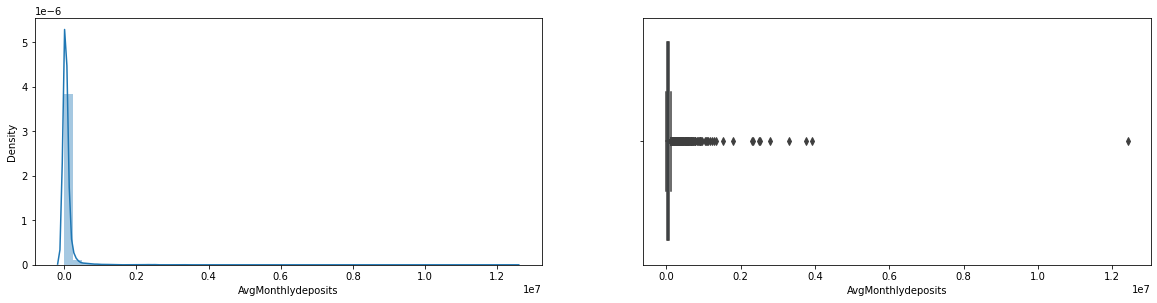

attribute_name : BankStatement_MA_NumReturnItems
Description of attribute : 

count    3022.000000
mean        1.049912
std         3.367273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666666
max        98.333333
Name: BankStatement_MA_NumReturnItems, dtype: float64 

Value counts of attribute : 

0.000000     1973
0.333333      120
1.000000      105
0.666666       73
0.500000       72
             ... 
22.333333       1
1.200000        1
13.333333       1
24.000000       1
13.250000       1
Name: BankStatement_MA_NumReturnItems, Length: 100, dtype: int64 

Unique number of attribute : 

[ 1.333333  0.        2.333333  6.        1.666666  1.        2.666666
  0.333333  3.666666  3.        4.666666  5.666666  2.        2.5
       nan  7.333333 12.333333  6.5      20.666666  0.5       5.333333
  0.666666  4.        1.5       3.333333  4.333333  9.333333  7.
 10.        5.5      11.333333  6.333333 15.333333  7.666666 13.333333
  7.5       9.       12.    

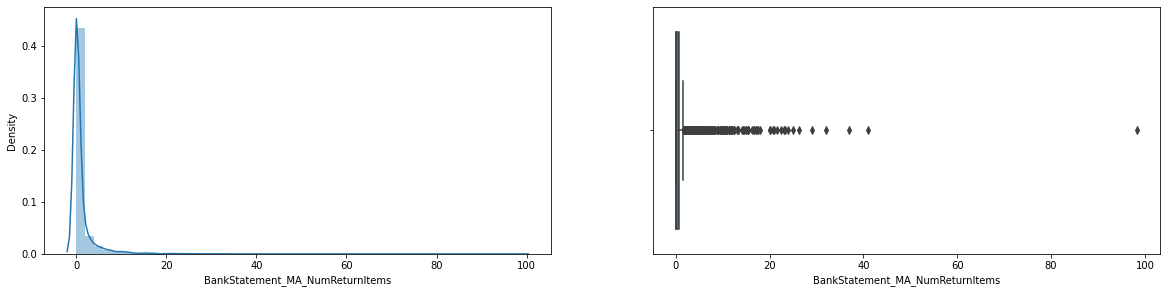

attribute_name : AvgDailybalance
Description of attribute : 

count    3.022000e+03
mean     1.206521e+04
std      6.877781e+04
min     -1.365124e+05
25%      1.554868e+03
50%      3.612000e+03
75%      8.427426e+03
max      3.129067e+06
Name: AvgDailybalance, dtype: float64 

Value counts of attribute : 

2036.000000     2
1404.666666     2
1140.333333     2
2916.666666     2
1930.666666     2
               ..
6536.456000     1
1055.165000     1
8355.920000     1
1911.472500     1
22120.676666    1
Name: AvgDailybalance, Length: 3013, dtype: int64 

Unique number of attribute : 

[ 4292.88      1752.743333   650.333333 ...  5225.4925   16153.2425
 22120.676666] 

Missing values in attribute : 

36 

Missing values in attribute_% : 

1.1772400261608895 



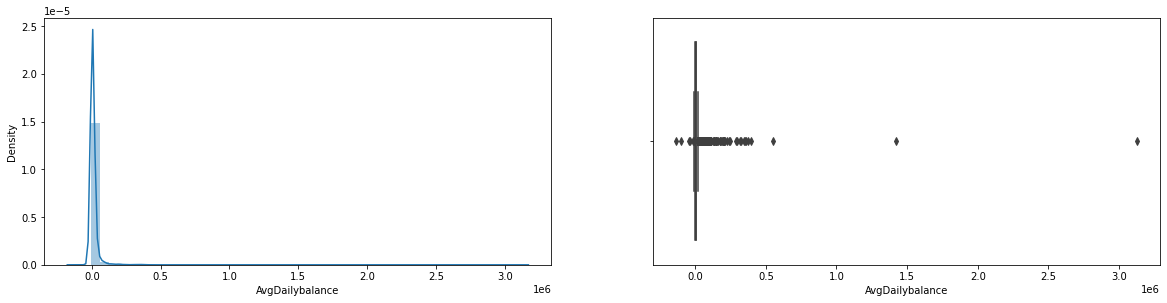

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    3022.000000
mean        0.945163
std         2.234658
min         0.000000
25%         0.000000
50%         0.000000
75%         0.750000
max        34.000000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     1866
0.333333      143
1.000000      130
0.250000       84
0.666666       79
             ... 
8.500000        1
6.250000        1
13.333333       1
14.666666       1
7.750000        1
Name: Avg_ReturnItemdays, Length: 81, dtype: int64 

Unique number of attribute : 

[ 1.        0.        2.        4.        4.333333  0.333333  1.666666
  6.666666  0.666666  7.       13.        1.333333  2.666666  2.333333
 11.333333  3.        2.5            nan  8.333333  7.666666  0.5
  5.333333  8.666666  4.5       3.333333  5.666666  9.666666  4.666666
  6.333333  6.        5.        9.333333 10.        9.        8.
  6.5      11.       13.333333 12.333333  5.25      3.666666 15.
  3

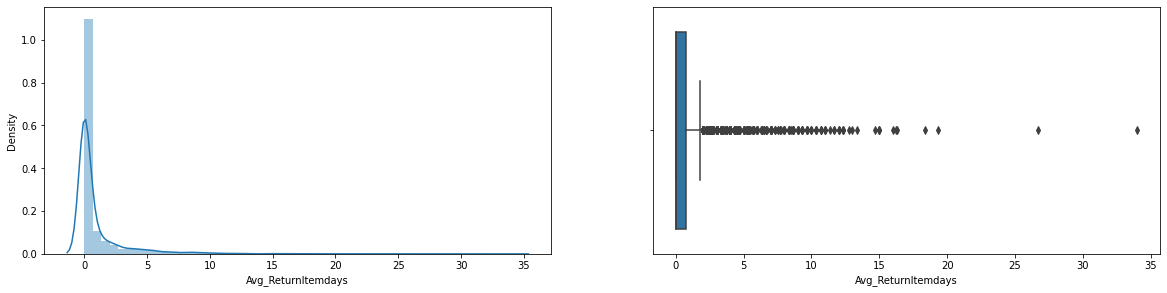

attribute_name : Credit_Score__c
Description of attribute : 

count    3047.000000
mean      549.924516
std       153.120028
min         0.000000
25%       532.000000
50%       578.000000
75%       621.500000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      159
595.0     32
550.0     29
1.0       28
578.0     27
        ... 
449.0      1
800.0      1
734.0      1
768.0      1
714.0      1
Name: Credit_Score__c, Length: 319, dtype: int64 

Unique number of attribute : 

[533. 528. 619. 659.   0. 524. 636. 647. 615. 531. 467. 522. 610. 640.
 671. 509. 572. 543. 558. 483. 699. 620. 686. 565. 658. 545. 546. 541.
 504. 586. 493. 673. 563. 527. 621. 623. 739. 684. 611. 465. 535. 600.
 552. 668. 500. 576. 515. 539. 654. 746.  nan 476. 525. 518. 463. 491.
 440. 508. 629. 523. 464. 630. 607. 538. 438. 554. 472. 485. 570. 639.
 644. 646. 613. 653. 498. 526. 688. 652. 497. 612. 516. 582. 577. 627.
 573. 802. 510. 585. 583. 590. 562. 567. 569. 680

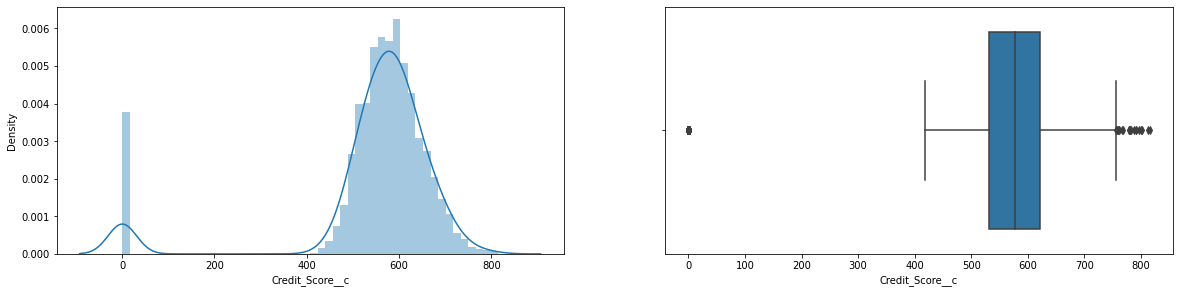

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    3049.000000
mean       98.537199
std         5.823963
min        34.480000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    2734
90.00        3
93.75        2
94.47        2
98.17        2
          ... 
90.76        1
66.72        1
82.54        1
80.20        1
84.31        1
Name: Renewal_PreviousPace, Length: 291, dtype: int64 

Unique number of attribute : 

[100.    79.55  92.31    nan  97.22  90.24  77.85  83.33  77.27  74.9
  77.78  63.18  78.13  83.04  83.72  95.65  82.45  91.27  90.96  96.18
  94.09  64.93  78.    95.03  80.13  98.21  96.19  90.82  97.52  88.9
  92.69  93.77  79.71  68.75  69.23  87.93  92.86  92.47  99.99  96.01
  97.3   91.67  90.    89.63  87.36  97.92  91.36  93.28  90.15  94.12
  84.11  91.53  93.72  97.7   64.04  77.12  84.14  91.3   81.18  84.17
  87.25  72.44

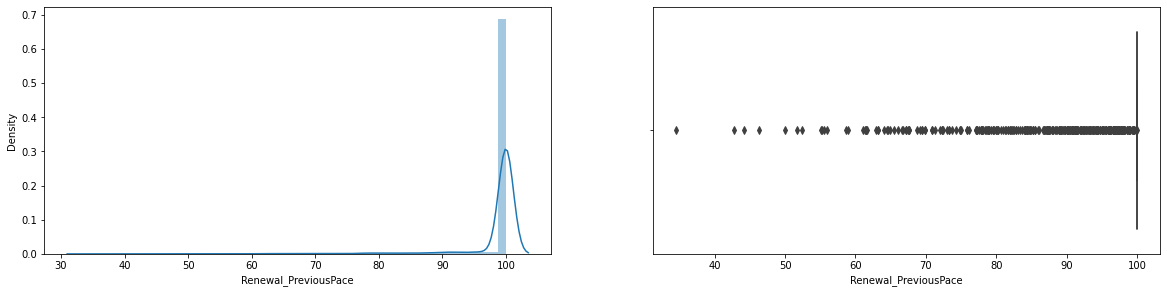

In [ ]:
missing_attributes = ['LatestMonth_ReturnItemDays',
                      'Renewal_PreviousPaidPercentageOfRTR',
                      'PctChangeInReveune',
                      'Renewal_PreviousAvgDailyBalance',         
                      'Renewal_PreviousAvgMonthRevenue', 
                      'PctAvgDailybalance2AvgMonthlyDeposits',   
                      'BankStatement_MA_OverdraftDays',           
                      'AvgMonthlydeposits',        
                      'BankStatement_MA_NumReturnItems',          
                      'AvgDailybalance',                         
                      'Avg_ReturnItemdays',                       
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace']    

for col in missing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [ ]:
data['LatestMonth_ReturnItemDays'].fillna(data['LatestMonth_ReturnItemDays'].median(), inplace = True)
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(), inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(), inplace = True)
data['Renewal_PreviousAvgDailyBalance'].fillna(data['Renewal_PreviousAvgDailyBalance'].median(), inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(), inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(), inplace = True)
data['BankStatement_MA_OverdraftDays'].fillna(data['BankStatement_MA_OverdraftDays'].median(), inplace = True)
data['AvgMonthlydeposits'].fillna(data['AvgMonthlydeposits'].median(), inplace = True)
data['BankStatement_MA_NumReturnItems'].fillna(data['BankStatement_MA_NumReturnItems'].median(), inplace = True)
data['AvgDailybalance'].fillna(data['AvgDailybalance'].median(), inplace = True)
data['Avg_ReturnItemdays'].fillna(data['Avg_ReturnItemdays'].median(), inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)

In [ ]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

585.8713286713287

In [ ]:
data['Credit_Score__c'].fillna(credit_mean,inplace = True)

In [ ]:
data['NetWO'].fillna(0,inplace = True)
data['FundedWriteOffAmount_Gross'].fillna(0,inplace = True)

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

OpportunityID                            0.0
HB_with_LCF_Payment__c                   0.0
PctAvgDailybalance2AvgMonthlyDeposits    0.0
PctChangeInReveune                       0.0
LatestMonth_ReturnItemDays               0.0
Avg_ReturnItemdays                       0.0
NetWO                                    0.0
WOGross_AdvanceBalance                   0.0
FundedWriteOffAmount_Gross               0.0
WriteOff_YN                              0.0
Paybackamount                            0.0
FundedAmount                             0.0
AvgDailybalance                          0.0
AvgMonthlydeposits                       0.0
Time_in_Business__c                      0.0
Renewal_PreviousPace                     0.0
Credit_Score__c                          0.0
BankStatement_MA_NumReturnItems          0.0
BankStatement_MA_OverdraftDays           0.0
NumberOfBankStatements                   0.0
Renewal_TwoWeekBounces                   0.0
Renewal_PreviousAvgDailyBalance          0.0
Renewal_Pr

In [ ]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/V7_after_eda_data.xlsx',index = False)